## Bitcoint price prediction with MLP

In [1]:
import numpy as np
import tensorflow as tf

model = tf.keras.models.load_model('./weights/')
model.summary()

2022-05-18 10:38:51.541904: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

In [2]:
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
print(X_test.shape)
print(y_test.shape)

(50, 32)
(50,)


In [3]:
# make predictions
y_pred = model.predict(X_test)
y_pred = y_pred*60000
y_test = y_test*60000

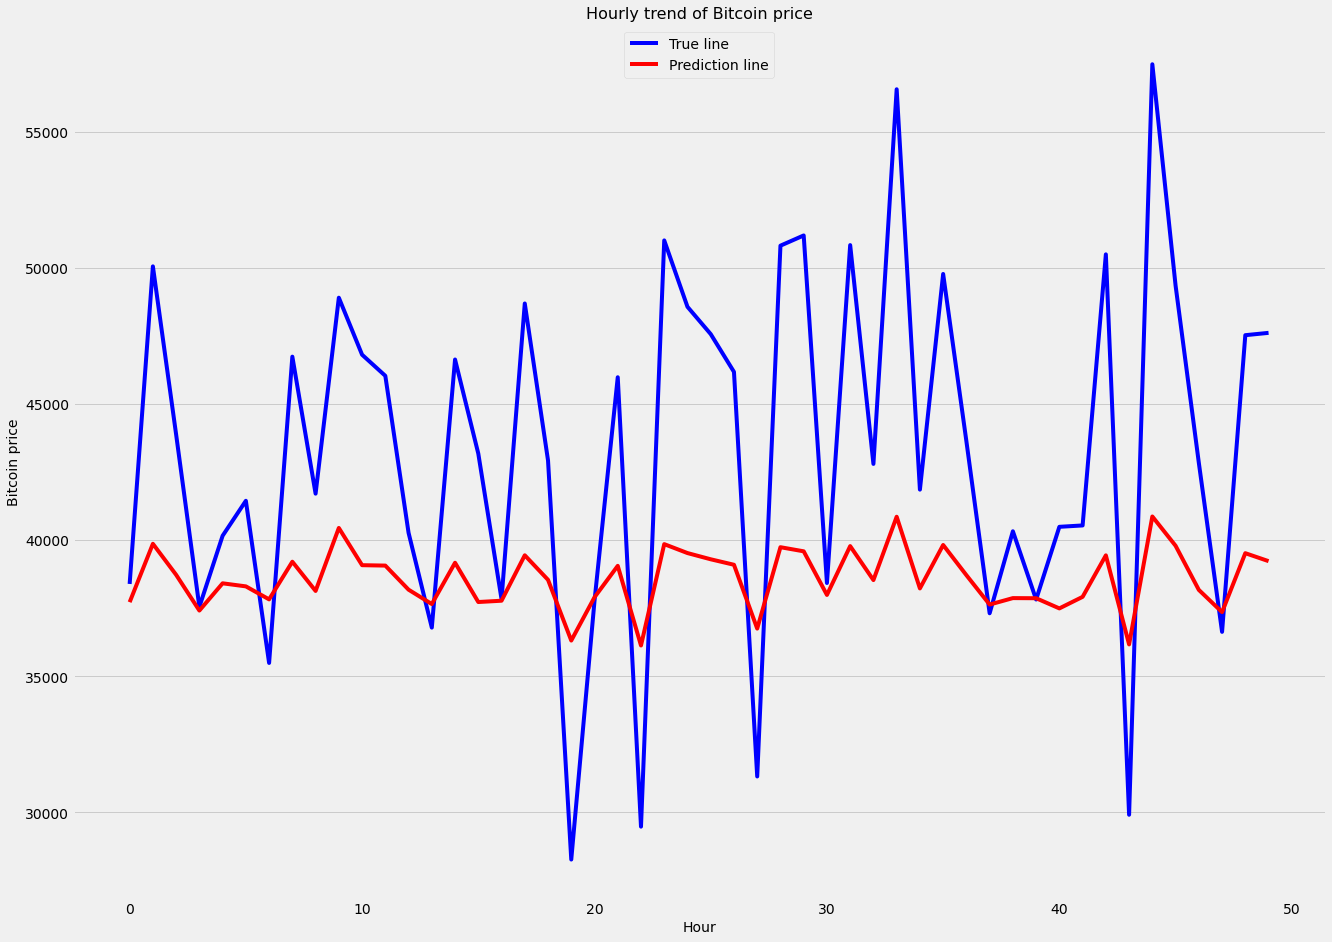

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)

# plot the data
with plt.style.context('fivethirtyeight'):
    plt.plot(y_test, c = 'b',label = 'True line')
    plt.plot(y_pred, c = 'r',label = 'Prediction line')
    plt.xlabel('Hour',fontsize=14)
    plt.ylabel('Bitcoin price',fontsize=14)
    plt.title('Hourly trend of Bitcoin price',fontsize=16)
    plt.grid(axis='x')
    legend = plt.legend(loc='upper center')
    plt.show()